In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/home/foriequal0/.local/share/virtualenvs/tf-tutorial-pgL6-UTG/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from tensorflow.examples.tutorials.mnist import mnist, input_data
data_sets = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz


Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
example_to_show = 10

num_hidden_1 = 256
num_hidden_2 = 128
num_input = mnist.IMAGE_PIXELS

X = tf.placeholder(tf.float32, [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

In [7]:
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2

def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

y_pred = decoder_op
y_true = X

loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
training_op = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()

In [12]:
sess = tf.Session() 
sess.run(init)

for i in range(1, num_steps+1):
    batch_x, _= data_sets.train.next_batch(batch_size)
    _, l = sess.run([training_op, loss], feed_dict={X: batch_x})
    
    if i % display_step == 0 or i == 1:
        print("Step {}: Loss {}".format(i, l))

Step 1: Loss 0.4457974433898926


Step 1000: Loss 0.16188430786132812


Step 2000: Loss 0.1472562998533249


Step 3000: Loss 0.14267973601818085


Step 4000: Loss 0.13562726974487305


Step 5000: Loss 0.12576931715011597


Step 6000: Loss 0.12222491204738617


Step 7000: Loss 0.118595652282238


Step 8000: Loss 0.11510193347930908


Step 9000: Loss 0.11273783445358276


Step 10000: Loss 0.10792709141969681


Step 11000: Loss 0.10362628102302551


Step 12000: Loss 0.10490188002586365


Step 13000: Loss 0.10055840015411377


Step 14000: Loss 0.10028664767742157


Step 15000: Loss 0.09468290954828262


Step 16000: Loss 0.09558878093957901


Step 17000: Loss 0.09436196833848953


Step 18000: Loss 0.09067033976316452


Step 19000: Loss 0.08771824091672897


Step 20000: Loss 0.08541330695152283


Step 21000: Loss 0.08567370474338531


Step 22000: Loss 0.08635809272527695


Step 23000: Loss 0.08363891392946243


Step 24000: Loss 0.08104914426803589


Step 25000: Loss 0.08325929194688797


Step 26000: Loss 0.07683991640806198


Step 27000: Loss 0.07679371535778046


Step 28000: Loss 0.07588125765323639


Step 29000: Loss 0.07569140940904617


Step 30000: Loss 0.07230718433856964


Original Images


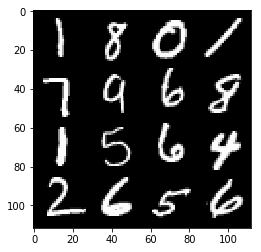

Reconstructed Images


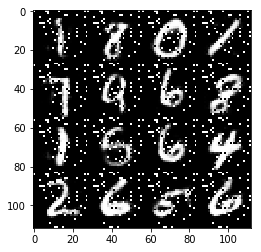

In [13]:
n = 4
w = mnist.IMAGE_SIZE
canvas_orig = np.empty([w * n, w * n])
canvas_recon = np.empty([w * n, w * n])
for i in range(n):
    batch_x, _ = data_sets.test.next_batch(n)
    g = sess.run(decoder_op, feed_dict={X: batch_x})
    
    # Display original images
    for j in range(n):
        canvas_orig[i * w:(i + 1) * w, j * w:(j + 1) * w] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        canvas_recon[i * w:(i + 1) * w, j * w:(j + 1) * w] = g[j].reshape([28, 28])
        

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()